In [45]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
plt.style.use('ggplot')

import nltk

df = pd.read_csv('E:\ML Learning\PROJECT_SENTIMENT_ANALYSIS_WHITE_HOUSE\whiteHouseBriefing\whiteHouseBriefing\data.csv')

<>:10: SyntaxWarning: invalid escape sequence '\M'
<>:10: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Admin\AppData\Local\Temp\ipykernel_5788\3015989524.py:10: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('E:\ML Learning\PROJECT_SENTIMENT_ANALYSIS_WHITE_HOUSE\whiteHouseBriefing\whiteHouseBriefing\data.csv')


In [7]:
#Read in data
print(df.shape)

(10789, 5)


In [10]:

df.head()
df2 = df 

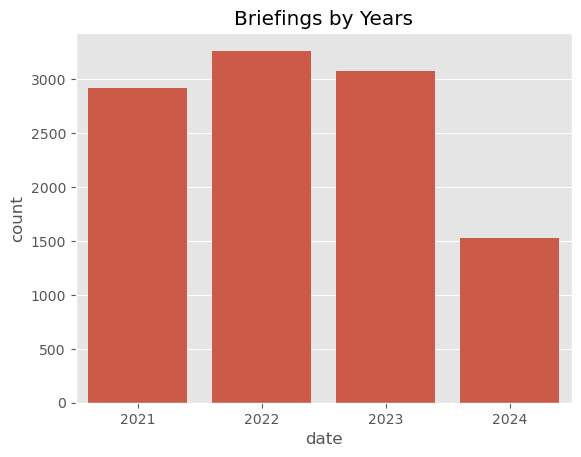

In [14]:
#EDA : Briefings by Years
df['date'] = pd.to_datetime(df2['date'] )
year = df2['date'].dt.year
df2['date'] = pd.to_datetime(df2['date'])
ax = sns.countplot(data=df2, x = year)
ax.set_title("Briefings by Years")

plt.show()



In [15]:
#EDA : Briefings by Quarter for each years

df2['quarter'] = pd.PeriodIndex(df.date, freq='Q')

In [16]:
df2.head()

,briefing_type,content,date,title,url,quarter
0,Speeches and Remarks,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-06-29,Remarks by President Biden at a Campaign Recep...,https://www.whitehouse.gov/briefing-room/speec...,2024Q2
1,Blog,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-07-01,Building a Thriving Clean Energy Economy in 20...,https://www.whitehouse.gov/briefing-room/blog/...,2024Q3
2,Statements and Releases,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-07-01,Statement from President Joe Biden on Extendin...,https://www.whitehouse.gov/briefing-room/state...,2024Q3
3,Statements and Releases,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-07-01,A Proclamation on the 60th Anniversary of the ...,https://www.whitehouse.gov/briefing-room/state...,2024Q3
4,Speeches and Remarks,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-06-29,Remarks by President Biden at a Campaign Recep...,https://www.whitehouse.gov/briefing-room/speec...,2024Q2


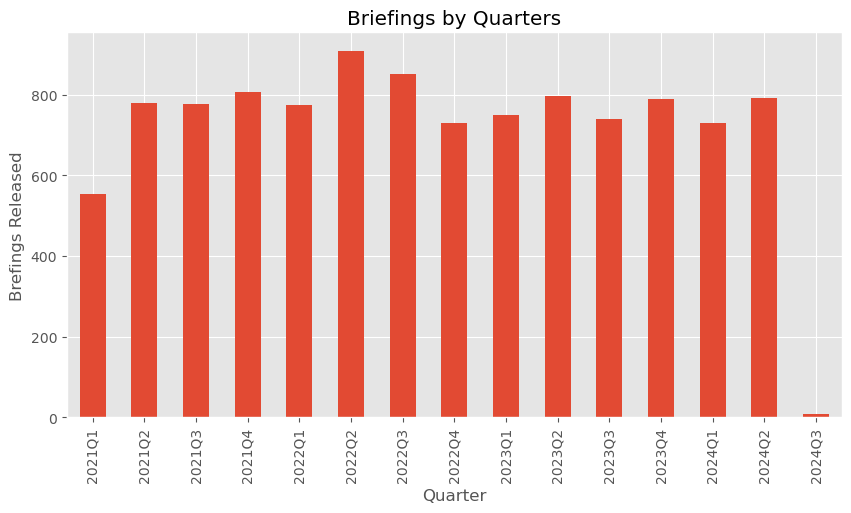

In [19]:
#EDA : Briefings by Quarters
ax = df2['quarter'].value_counts().sort_index() \
    .plot(kind = 'bar',
          title = 'Briefings by Quarters',
          figsize=(10,5))
ax.set_xlabel('Quarter')
ax.set_ylabel('Brefings Released')
plt.show()

In [18]:
#IMPORTING PIPELINE
import pandas as pd
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [40]:
# MODEL = f'distilbert/distilbert-base-uncased-finetuned-sst-2-english'
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)

#choosing the model

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL).to("cuda:0")


In [77]:
#test function

example = "The White one. Letâ€™s begin again with the state of the pandemic.,Yesterday, CDC reported over 41,900 new cases of COVID-19. Our seven-day average is about 45,800 cases per day, with both the 117 and the problematic 351, both had 100 percent efficacy after two doses.,And so, on the final slide, what weâ€™ve all been saying: Letâ€™s go for the 70 percent of adults vaccinated with at least one dose by July 4. And Iâ€™m confident that we can mimic the pattern that Iâ€™ve just showed you on the previous slide.,Iâ€™ll stop there, and over to you, Dr. Murthy.,SURGEON GENERAL MURTHY: Thanks so much, Dr. Fauci. I appreciate it. And itâ€™s great to be with all of you again this morning. I want to say a few words about our public education efforts and our broader confidence campaign.,Weâ€™ve continued our public education and engagement campaign, and we continue to see positive movement toward our vaccination goals. Thereâ€™s new data out this week that shows vaccine confidence and vaccination continue to increase.,The proportion of adults who either received the vaccine or are planning to get it rose to 64 percent. And just for perspective: This number was 34 percent in December, and it has increased each month since then.,Additionally, at least 50 percent of every major adult demographic group across age, race, gender, education, and political leaning now has already gotten vaccinated or wants to. That is real progress.,With that said, there is no doubt that many people still have questions about the vaccines, and thatâ€™s why we will continue to work hard to ensure people get science-based information from voices they know and trust.,But itâ€™s also true that vaccine confidence is only one piece of the puzzle. The barriers to getting vaccinated fall into three main categories: vaccine confidence, motivation, and access.,And we see this reflected in this weekâ€™s data, which found that a substantial portion of unvaccinated people cited other reasons other than confidence for not yet getting their shots, and those reasons included: not enough time, conflicts with work hours, uncertainty about eligibility, lack of information about where to get the vaccine, and feeling the vaccine may be unnecessary, among other reasons.,The good news is that our COVID-19 Community Corps is working hard to address all three challenges of vaccine confidence, motivation, and access. And today, I want to share a few stories about their work.,One of our members, PrepareSTL, is engaging communities of color in St. Louis through peer-to-peer outreach. Theyâ€™re hosting small-group conversations of 10 or fewer people. And they ultimately aim to share vaccine information with over 6,000 community members.,The Congdon Street Baptist Church and other churches in Providence, Rhode Island, have been using their existing phone trees to call community members about getting vaccinated, even offering to drive them to vaccination sites when theyâ€™re ready.,And finally, I want to highlight BAPS Charities, a Hindu-American organization that has turned their temples into vaccination centers. For elderly members of these temples, itâ€™s been easier to get vaccinated at their own temple, surrounded by trusted friends and familiar settings, than it may have been for some of them to get vaccinated at an unfamiliar location.,So, from California to Missouri to Rhode Island, these organizations are showing us that we need a strong, people-powered movement to address these three main barriers to vaccination: vaccine confidence, motivation, and access. And thatâ€™s why weâ€™re also making significant federal investments towards these goals.,Weâ€™ve dedicated $250 million for community organizations to provide vaccine information, help make appointments, and assist with transportation to those appointments. We also, this week, announced an additional $130 million, which will support equity efforts for hard to reach and high-risk communities; and another $100 million will support rural health clinics in their education and outreach efforts in rural communities. On top of this, nearly $250 million will be available to states and other jurisdictions to power the next phase of their outreach efforts.,This is also why the administration this week rolled out additional tools to make it even more convenient to find a vaccine. So you can now enter your ZIP Code on Vaccines.gov, which is in English and Spanish, and get locations where you can get vaccinated around you.,And you can also text your ZIP Code to the number, 438829, which spells â€œGetVaxâ€; or to 822862, which spells â€œVacunaâ€, and youâ€™ll receive these vac- â€” three vaccination sites near you. Itâ€™s really quick and easy to do. I find myself doing it a few times just to see what comes up and make sure everything is still working. And everything is great and itâ€™s a tool that weâ€™ve had a lot of good feedback on so far. So I encourage you to use that text tool, use the website. It makes it easy to find out where to get vaccinated.,I lastly just want to speak directly to the people who are wondering in this moment if itâ€™s still important for them to get vaccinated: Please do get vaccinated. It really does matter. Because even if youâ€™re not at high risk for severe illness from COVID-19, we know that you can still get infected even without symptoms and spread the virus to others who are at higher risk of hospitalization and death. We saw that time and time again over the past year, and that is in fact how many people acquired the virus and ultimately passed away from it.,When you get vaccinated though, you break that chain of transmission by giving the virus one less place to hide in your community. The only way to get cases to come down and stay down is for everyone to get vaccinated. Thatâ€™s how you can protect your community and help all of us return to the activities and the life we love.,I know itâ€™s been a difficult year and that everyone in our country has been asked to step up and sacrifice in a big way. And I want to be clear that this pandemic will end. The faster we get vaccinated, the faster that day will come.,And finally, I just want to wish everyone out there a Happy Motherâ€™s Day. I particularly want to recognize all the moms out there who have shouldered often a disproportionate amount of the challenge of COVID-19 of having to manage children and telework, as well as manage virtual learning. Moms and dads have shared in that burden, but I know it has disproportionately followed â€” fallen on moms. And one of the most powerful things I â€” we think we can do for moms out there is to help end this pandemic quickly.,Thatâ€™s why vac- â€” getting vaccinated is so important. Itâ€™s our quickest way to ending the pandemic.,Thank you for your time. Iâ€™ll look forward to your questions.,Back to you, Jeff.,MR. ZIENTS: Thanks, Doctors. Letâ€™s open it up for a few questions.,MODERATOR: Thanks, Jeff. Reminder: Keep your questions to one question so we can get as many through.,First, letâ€™s go to David Lim at Politico.,QÂ  Hi guys. Thanks for taking the question. Nancy Messonnier, who was among the first to warn Americans of the threat that COVID-19 posed last year, announced this morning she is resigning from the CDC.,This question is for Dr. Walensky: Can you explain why she was reassigned two weeks ago away from the agencyâ€™s COVID-19 vaccine taskforce? And why is she now leaving the CDC?,DR. WALENSKY: Thank you very much for that question. As you note, Nancy has â€” Dr. Messonnier has been a true hero. And through her career, in terms of public health, sheâ€™s been a steward of public health for the nation. Over this pandemic and through a many-decade career, sheâ€™s made significant contributions, and she leaves behind a strong, strong force of leadership and courage in all that sheâ€™s done.,I want to wish her the best in her future endeavors. And I have no other comment. Thank you.,MODERATOR: Issam Ahmed, New York Public Radio.,QÂ  Hi, this Issam Ahmed with AFP. No, my question was on vaccinating with Pfizer â€” when it becomes â€” when it â€” if it gets full approval, will that mean itâ€™s then a standard of care? And will trials be able to continue with a placebo or not after that?,MR. ZIENTS: So, Iâ€™ll go first and then maybe, Dr. Fauci, you can also chime in if I â€” if I miss anything here.,Pfizer announced today that itâ€™s applying for full approval from the FDA. Itâ€™s important to start with: Nothing changes right now. The vaccine â€” the Pfizer vaccine is still authorized under emergency use authorization. So Pfizer has announced that it has initiated its application for full approval. And we anticiplate â€” anticipate that it will complete that application across the coming weeks.,These reviews generally take a few months, is our understanding. This is all over at the FDA, of course. Given the nature of the pandemic, FDA will move as expeditiously as possible without compromising its gold standard for safety.,Our focus remains on getting 70 percent of Americans â€” adult Americans at least one shot by July 4th, as the President has laid out that goal. And it will certainly be an important day if full approval is granted, but the process will be fully led and run by the FDA.,Dr. Fauci, anything to add here?,DR. FAUCI: Well, the question was about placebo. Right now, given the availability of vaccines, youâ€™d have to have a really very good reason to do a placebo-controlled trial right now. Most of the trials that they â€” when they do occur, would likely be of non-inferiority or superiority trials, where you would have to compare it to another product, as opposed to giving a placebo.,You give a placebo-control trial in a country in which there is no access whatsoever so that if the people in the trial were not in the trial, they still would not have access to a vaccine. Thatâ€™s not the situation in the United States.,So regardless of whether itâ€™s an EUA or itâ€™s a BLA â€” the same thing â€” you donâ€™t want to do a placebo right now.,MR. ZIENTS: Thank you Dr. Fauci. Â Next question.,MODERATOR: Shira Stein, Bloomberg.,QÂ  Hi. Thanks. What impact would a TRIPS waiver have on U.S. production, and could it undercut supply? And in addition to TRIPS, does the White House have any plans to push for broader international manufacturing capabilities?,MR. ZIENTS: Yeah, I think â€” let me start with: The right thing to do is the waiver. We are in unprecedented, once-in-a-hundred-year pandemic, and that calls for extraordinary measures in an extraordinary times.,You know, experts agree that the waiver alone wonâ€™t result in the scale and speed we need to make enough vaccines to end this pandemic, and thatâ€™s why we will continue to ramp up our efforts â€” working with the private sector and all possible partners â€” to expand vaccine manufacturing and distribution around the world and increase, as you point out, the important supplies, the raw materials, the equipment needed to make the vaccines.,Next question.,MODERATOR: Tommy Christopher, Mediaite.,QÂ  Hi, can you hear me now? Hello?,MR. ZIENTS: Yes.,QÂ  All right, good. Yes, thank you. My question is, I guess, for all of you. Thereâ€™s a new IHME report out that says the true death toll in the U.S. from coronavirus is over 900,000. And Iâ€™ve been wondering this for a while â€” I know the CDC tracks excess death figures and Iâ€™ve been wondering if thereâ€™s been any discussion of or plan to incorporate those figures into the official death toll, which, I guess, currently, is just confirmed deaths.,MR. ZIENTS: Dr. Walensky?,DR. WALENSKY: Yeah, thank you for that. So thatâ€™s a study that just came out from the IHME, where theyâ€™re now adding their excess deaths into their â€” their attributable deaths directly from COVID-19.,As you know, we have been collecting not only â€” and weâ€™ve known that the toll of this pandemic is not necessarily just those whoâ€™ve passed from COVID-19 specifically, but excess deaths relating to access to care, not presenting to care, and many other things.,So, we will look at this carefully, and then we will work with â€” within the CDC to make decisions as to whether to count them as excess or to count them as COVID-specific.,Regardless, I think we need to understand that the death toll of this disease has been attributable directly from COVID, as well as â€” as the collateral damage, I would say, of what has happened from COVID-19. And that, in my mind, is just more and more reason to continue to get vaccinated.,MR. ZIENTS: Next question.,MODERATOR: Zeke, AP.,QÂ  Thanks for doing this. We heard the President say that he wants to turn the U.S. â€” the U.S. sharing vaccinate â€” vaccines around the world to the arsenal of democracy. Now, a couple of weeks into this â€” this phase, I was hoping, Jeff, you might have some more guide â€” outlines on where the â€” on what criteria the White House will use to determine how to share vaccines with the rest of the world. Will it only be with allies? Will it be through COVAX, sort of, on a need basis? Is it a tool of foreign policy or is it a tool of philanthropy and public health?,MR. ZIENTS: So, Zeke, at â€” you know, at the moment, there are no AstraZeneca doses that completed and cleared the process to send to other countries. We expect there will be approximately 10 million doses that could be released in the coming weeks, after FDA concurrence. Thereâ€™s an estimated 50 million doses, in addition, that are in various stages of production that could be completed across May â€” or should be completed across May and June.,So, in sum, weâ€™re talking about about 60 million doses of AstraZeneca in the U.S. that cou- â€” that could be shared â€” will be shared with other countries over the next couple of months. As these doses become available, the plans will be finalized as to where they go.,Next question.,MODERATOR: Last question. Letâ€™s go to Jeremy Diamond at CNN.,QÂ  Hey, thanks so much. Just to follow up on what Zeke was asking: Do you have any metrics currently that you can share about how youâ€™re going to determine which countries receive the doses? And do you have an update on the status of the FDAâ€™s quality control review? And then, just secondly, according to this Kaiser Family Foundation poll, we now see that 18- to 29-year-olds are the most hesitant demographic. What do you guys see is the best way to move numbers with that age group?,MR. ZIENTS: Well, let me start with handing it over to Dr. Murthy on 18- to 29-year-olds.,Dr. Murthy.,DR. MURTHY: All right. Thanks, Jeff. I â€” so I appreciate that â€” the question about 18- to 29-year-olds. One of the reasons I specified that there are three distinct reasons that we think, at this point, people may not want to take a vaccine is because weâ€™ve got to â€” weâ€™ve got to assume that everybody has doubts about the vaccine. We know some people have questions. We know some people just may not feel motivated, may not think itâ€™s important, and other people have access issues.,For 18- to 29-year-olds, what we know is that thereâ€™s some combination of these three things going on. And so what â€” our approach is, number one, make sure that people can get accurate information from trusted messengers. Eighteen- to twenty-nine-year-olds may listen to very different messengers than I would or perhaps some of us on this panel.,So part of our work through the Community Corps has been mobilizing, engaging those messengers.,The second thing that weâ€™re also doing is weâ€™re making sure that itâ€™s easy to get a vaccine. What you heard today from the President â€” or rather earlier this week from the President â€” was that a number of steps were being taken to set up mobile units, pop-up options for getting the vaccine, and walk-in options in pharmacies now to make it â€” again, lower the barriers to getting vaccine.,And finally, just remember this â€” that we have to continue to â€” to help, you know, people across the country understand why itâ€™s important to get vaccinated, even if you yourself may be at lower risk of complications.,Dr. Walensky mentioned her own children, you know, who are â€” who â€” two of whom were eager to get vaccinated, one of whom, you know, will likely get vaccinated soon.,And the point is: Now they can do things with their friends that they otherwise wouldnâ€™t â€” werenâ€™t able to do. They can go back to college, potentially feel much safer, you know, about not only their own risk of getting sick, but potentially the contribution they may make to other people getting sick by being transmitters.,So these are the messages weâ€™re going to continue to take to young people. And weâ€™re seeing more young people step up to want to carry this message, because, again, I believe strongly that young people are not just interested in staying healthy themselves, but they are the leaders in building a better future. And we are going to need them to step up to help spread this message and to get other young people vaccinated as quickly as possible.,MR. ZIENTS: On AstraZeneca, you know, the timing â€” as I mentioned earlier â€” for the first 10 million doses, we expect that across the coming weeks, all pending FDA concurrence.,And as those doses become available, the specific plans as to where they go will be announced at that point, and also the â€” you know, the framework for â€” for future decisions will also be articulated. So, no further news on that front.,With that, let me add my well wishes to all the moms out there: Happy Motherâ€™s Day. And we look forward to seeing everybody next week. Thank you.,ENDÂ  Â Â Â Â Â Â Â Â 11:13 A.M. EDT,To view the COVID Press Briefing slides, visit,https://www.whitehouse.gov/wp-content/uploads/2021/05/COVID-Press-Briefing_7May2021_for-trascript.pdf,We'll be in touch with the latest information on how President Biden and his administration are working for the American people, as well as ways you can get involved and help our country build back better.,Opt in to send and receive text messages from President Biden.,The White House,1600 Pennsylvania Ave NW,Washington, DC "
encoded_text = tokenizer.encode_plus(example,max_length=512, truncation= True,padding='max_length',return_tensors='pt').to('cuda:0')
output = model(**encoded_text)
scores = output[0][0].detach().cpu().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.018618131, 'roberta_neu': 0.22596548, 'roberta_pos': 0.7554164}


In [78]:


def polarity_scores_roberta(text):
    encoded_text = tokenizer.encode_plus(text,max_length=512, truncation= True,padding='max_length',return_tensors='pt').to('cuda:0')
    output = model(**encoded_text)
    scores = output[0][0].detach().cpu().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict




In [79]:

res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        content = row['content']
        quarter = row['quarter']
        result = polarity_scores_roberta(content)
        res[quarter] = result
    except RuntimeError:
        print(f'Broke for id {quarter}')
        roberta_result = polarity_scores_roberta(content)
        res[quarter] = both
    except RuntimeError:
        print(f'Broke for id {quarter}')



  0%|          | 0/10789 [00:00<?, ?it/s]

In [80]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index' : "quarter"})
results_df = results_df.merge(df2, how = 'left')

In [81]:

results_df

,quarter,roberta_neg,roberta_neu,roberta_pos,briefing_type,content,date,title,url
0,2024Q2,0.200637,0.739955,0.059408,Speeches and Remarks,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-06-29,Remarks by President Biden at a Campaign Recep...,https://www.whitehouse.gov/briefing-room/speec...
1,2024Q2,0.200637,0.739955,0.059408,Speeches and Remarks,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-06-29,Remarks by President Biden at a Campaign Recep...,https://www.whitehouse.gov/briefing-room/speec...
2,2024Q2,0.200637,0.739955,0.059408,Speeches and Remarks,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-06-18,Remarks as Prepared for Delivery by First Lady...,https://www.whitehouse.gov/briefing-room/speec...
3,2024Q2,0.200637,0.739955,0.059408,Statements and Releases,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-06-18,Statement from Vice President Kamala Harris on...,https://www.whitehouse.gov/briefing-room/state...
4,2024Q2,0.200637,0.739955,0.059408,Speeches and Remarks,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-06-18,Remarks by President Biden at a Campaign Recep...,https://www.whitehouse.gov/briefing-room/speec...
...,...,...,...,...,...,...,...,...,...
10784,2024Q1,0.014081,0.489689,0.496230,Statements and Releases,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-03-27,Statement from President Joe Biden Congratulat...,https://www.whitehouse.gov/briefing-room/state...
10785,2024Q1,0.014081,0.489689,0.496230,Speeches and Remarks,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-03-28,Press Call by Vice President Harris On Artific...,https://www.whitehouse.gov/briefing-room/speec...
10786,2024Q1,0.014081,0.489689,0.496230,Statements and Releases,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-03-28,FACT SHEET: Vice President Harris Announces OM...,https://www.whitehouse.gov/briefing-room/state...
10787,2024Q1,0.014081,0.489689,0.496230,Speeches and Remarks,"The White House,1600 Pennsylvania Ave NW,Washi...",2024-03-27,Remarks as Prepared for Delivery by First Lady...,https://www.whitehouse.gov/briefing-room/speec...


In [83]:
results_df.to_csv('roberta_scored_briefings.csv', index = False)